In [2]:
using JLD2, Flux
include("DenseNTk.jl"); include("FastNTKMethods.jl")

kernel (generic function with 3 methods)

In [3]:
h = 0.15; x0 = -1.0; xn = 1.0; activation = relu; dim = 1; N1 = 10_000
# We create some data (normalized)
x = hcat(range(x0,stop=xn,step=h)...)
f = x->exp(sin(x*pi))
y = map(f,x)
delay = length(x)*1.2

model = Chain(DenseNTK(dim=>N1,activation),DenseNTK(N1=>dim))|>f64
detail = 3


params = load_object("Params2.jld2")

Params([[1.0968703335112986; -0.45288116752014196; … ; -0.1124672070145607; 0.2025801187699651;;], [0.7584814084275027, 0.45288116752014396, -0.5172544813494837, -1.207450270652771, -0.14477498462629973, -0.8640130162239075, -1.2396204471588135, -0.9861288070678711, -0.6439323425292969, -0.5266333144436399  …  -0.5339170506149805, 0.9377475216853197, -0.7645753622055054, 3.086245762642227, -0.7741057276725769, -1.3375580310821533, -0.4722837482575444, -0.549982776850406, -0.6958848237991333, 0.9365089953835278], [-1.148064227490924 0.35358140217698586 … -0.9332323670387268 -0.3412958323534259], [0.2791798245024767]])

In [4]:
Flux.params(model)[1] .= params[1]
Flux.params(model)[2] .= params[2]
Flux.params(model)[3] .= params[3]
Flux.params(model)[4] .= params[4]

1-element Vector{Float64}:
 0.2791798245024767

In [5]:
model(x)
Loss(model,x,y) = Flux.mse(y,model(x))
Loss(model,x,y)
h2= 0.2; x02 = -1.0; xn2 = 1.0; activation = relu; dim = 1; N1 = 10_000
# We create some data (normalized)
x2 = hcat(range(x02,stop=xn2,step=h2)...)
y2 = map(f,x2)

1×11 Matrix{Float64}:
 1.0  0.555556  0.386333  0.386333  …  1.8  2.58844  2.58844  1.8  1.0

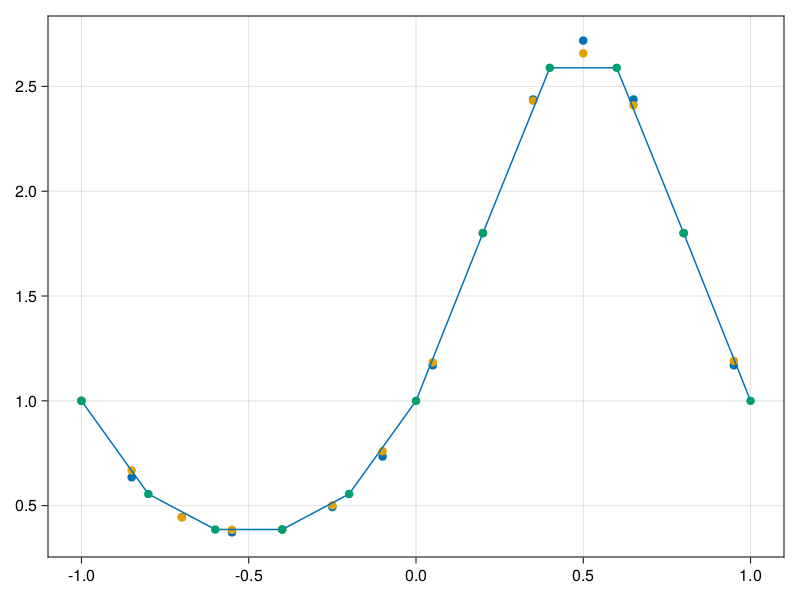

In [6]:
using CairoMakie

fig = Figure(); ax = Axis(fig[1,1]); 
CairoMakie.scatter!(x[:],y[:])
CairoMakie.scatter!(x[:],model(x)[:])
CairoMakie.lines!(x2[:],y2[:])
CairoMakie.scatter!(x2[:],model(x2)[:])
fig